In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

wine_dataset = load_wine()
logreg = LogisticRegression(max_iter=5000)

scores = cross_val_score(logreg, wine_dataset.data, wine_dataset.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.97222222 0.91666667 0.91666667 1.         1.        ]


In [53]:
scores = cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.94444444 0.94444444 0.94444444 0.94444444 0.94444444 0.94444444
 1.         1.         1.         1.        ]


In [54]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


In [55]:
from sklearn.model_selection import cross_validate
import pandas as pd
res = cross_validate(logreg, wine_dataset.data, wine_dataset.target, cv=10, return_train_score=True)
display(res)
print("-"*100)
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

{'fit_time': array([0.46352696, 0.53160453, 0.41541076, 0.43755388, 0.52106643,
        0.46036959, 0.6193254 , 0.61037135, 0.53128362, 0.48405814]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
        0.94444444, 1.        , 1.        , 1.        , 1.        ]),
 'train_score': array([0.99375   , 0.99375   , 1.        , 0.99375   , 0.99375   ,
        1.        , 0.99375   , 0.99375   , 0.99378882, 0.99378882])}

----------------------------------------------------------------------------------------------------


,fit_time,score_time,test_score,train_score
0,0.463527,0.0,0.944444,0.993750
1,0.531605,0.0,0.944444,0.993750
2,0.415411,0.0,0.944444,1.000000
3,0.437554,0.0,0.944444,0.993750
4,0.521066,0.0,0.944444,0.993750
5,0.460370,0.0,0.944444,1.000000
6,0.619325,0.0,1.000000,0.993750
7,0.610371,0.0,1.000000,0.993750
8,0.531284,0.0,1.000000,0.993789
9,0.484058,0.0,1.000000,0.993789


Mean times and scores:
 fit_time       0.507457
score_time     0.000000
test_score     0.966667
train_score    0.995008
dtype: float64


In [56]:
print("Метки вин:\n{}".format(wine_dataset.target))

Метки вин:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [57]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         0.88888889 1.         0.88888889 0.83333333 0.94444444
 1.         0.88888889 1.         1.        ]


In [58]:
kfold = KFold(n_splits=3)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=kfold)))

# Как и в случае с датасетом iris, использование трехблочной перекрестной проверки для набора данных wine является плохой идеей

Значения правильности перекрестной проверки:
[0.01666667 0.74576271 0.18644068]


In [59]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=kfold)))

# После перемешивания данных, результат стал лучше, но как по мне, все же разбиение на большее количество блоков дает лучше результат

Значения правильности перекрестной проверки:
[0.98333333 0.88135593 0.96610169]


In [61]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=loo)

print("Количесто итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

# Заняло больше минуты (долго по сравнению с предыдущими перекрестными проверками), да и результат хуже. 
# Перекрестная проверка с исключением по одному не особо подходит для wine

Количесто итераций:  178
Средняя правильность: 0.96


In [62]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size = .5, n_splits=10)
scores = cross_val_score(logreg, wine_dataset.data, wine_dataset.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.96629213 0.98876404 0.95505618 0.96629213 0.96629213 0.94382022
 0.92134831 0.96629213 0.96629213 0.94382022]


In [67]:
# простой решетчатый поиск
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target, random_state=0)
print("Размер обучающего набора: {} \nРазмер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))
# при значении параметров [0.001,0.01,0.1,1,10,100] значение правильности слишком низок-0.84
# при значении параметров [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000] 
# наилучшее значение правильности-0.96 при параметрах {'C': 1000, 'gamma':0.00001}

Размер обучающего набора: 133 
Размер тестового набора: 45
Наилучшее значение правильности: 0.96
Наилучшее значение параметров: {'C': 1000, 'gamma': 1e-05}


In [72]:
from sklearn.svm import SVC 
# разбиваем данные на обучающий+проверочный набор и тестовый набор 
X_trainval, X_test, y_trainval, y_test = train_test_split(wine_dataset.data, wine_dataset.target, random_state=0) 
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} \nРазмер проверочного набора: {} \nРазмер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
 
best_score = 0 
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:     
    for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:         
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train)         
        score = svm.score(X_valid, y_valid) 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score)) 
print("Наилучшие значения параметров: ", best_parameters) 
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))  
# правильность классификации новых данных все еще составляет 96% как получилось ранее

Размер обучающего набора: 99 
Размер проверочного набора: 34 
Размер тестового набора: 45

Лучшее значение правильности на проверочном наборе: 0.85
Наилучшие значения параметров:  {'C': 1000, 'gamma': 1e-05}
Правильность на тестовом наборе с наилучшими параметрами: 0.96


In [76]:
import numpy as np
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=10)
        score = np.mean(scores)
        # если получаем лучшее решение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10000, gamma=1e-05)

In [86]:
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
              'gamma': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
             }
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target, random_state=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]})

In [88]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test,y_test)))

Правильность на тестовом наборе: 0.91


In [90]:
print("Наилучшее значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидационной правильности: {:.2f}".format(grid_search.best_score_))

Наилучшее значения параметров: {'C': 10000, 'gamma': 1e-05}
Наилучшее значение кросс-валидационной правильности: 0.93


In [91]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=10000, gamma=1e-05)


In [92]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003204,0.002546,0.001343,0.002324,0.00001,0.00001,"{'C': 1e-05, 'gamma': 1e-05}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,29
1,0.001718,0.003391,0.000000,0.000000,0.00001,0.0001,"{'C': 1e-05, 'gamma': 0.0001}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,29
2,0.001750,0.004905,0.000800,0.002400,0.00001,0.001,"{'C': 1e-05, 'gamma': 0.001}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,29
3,0.003959,0.004844,0.000000,0.000000,0.00001,0.01,"{'C': 1e-05, 'gamma': 0.01}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,29
4,0.003982,0.006352,0.000000,0.000000,0.00001,0.1,"{'C': 1e-05, 'gamma': 0.1}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,29


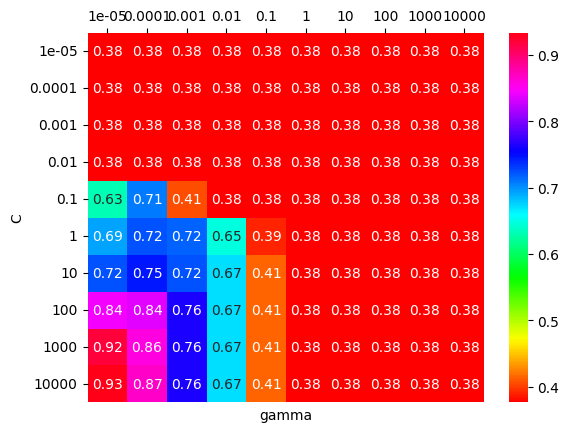

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(10,10)

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()

plt.show()

In [94]:
param_grid = [
    {
        'kernel':['rbf'],
        'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
        'gamma':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    },
    {
        'kernel':['linear'],
        'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    }
]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}, {'kernel': ['linear'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]


In [96]:
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшие значения кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

# использование параметра kernel значения 'linear' сильно улучшило значение правильности - аж 0.98, хотя по времени занимает дольше обычного

Наилучшие значения параметров: {'C': 0.1, 'kernel': 'linear'}
Наилучшие значения кросс-валидац. правильности: 0.98


In [97]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003450,0.004247,0.001224,0.003559,0.00001,0.00001,rbf,"{'C': 1e-05, 'gamma': 1e-05, 'kernel': 'rbf'}",0.357143,0.357143,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,39
1,0.002489,0.003444,0.000677,0.002031,0.00001,0.0001,rbf,"{'C': 1e-05, 'gamma': 0.0001, 'kernel': 'rbf'}",0.357143,0.357143,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,39
2,0.001617,0.002718,0.000153,0.000458,0.00001,0.001,rbf,"{'C': 1e-05, 'gamma': 0.001, 'kernel': 'rbf'}",0.357143,0.357143,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,39
3,0.002846,0.004517,0.000913,0.001598,0.00001,0.01,rbf,"{'C': 1e-05, 'gamma': 0.01, 'kernel': 'rbf'}",0.357143,0.357143,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,39
4,0.003271,0.003262,0.000552,0.001657,0.00001,0.1,rbf,"{'C': 1e-05, 'gamma': 0.1, 'kernel': 'rbf'}",0.357143,0.357143,...,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.088673,0.031185,0.001318,0.003955,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.928571,1.000000,...,1.000000,1.000000,0.923077,1.000000,1.000000,0.923077,1.000000,0.970330,0.036380,2
106,0.140377,0.052885,0.001003,0.002410,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",0.928571,0.928571,...,1.000000,1.000000,0.923077,1.000000,1.000000,0.923077,1.000000,0.963187,0.036862,3
107,0.146461,0.051296,0.000453,0.001358,100,NaN,linear,"{'C': 100, 'kernel': 'linear'}",0.928571,0.928571,...,1.000000,1.000000,0.923077,1.000000,1.000000,0.923077,1.000000,0.963187,0.036862,3
108,0.134010,0.053220,0.002482,0.003363,1000,NaN,linear,"{'C': 1000, 'kernel': 'linear'}",0.928571,0.928571,...,1.000000,1.000000,0.923077,1.000000,1.000000,0.923077,1.000000,0.963187,0.036862,3


In [98]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=10), wine_dataset.data, wine_dataset.target, cv=10)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднее значение правильности перекрестной проверки: ", scores.mean())
# заняло много времени, построено ведь 3600 моделей(немало)

Значения правильности перекрестной проверки:  [0.88888889 1.         0.88888889 0.94444444 0.94444444 1.
 1.         1.         1.         1.        ]
Среднее значение правильности перекрестной проверки:  0.9666666666666668


In [100]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)   
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [101]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(wine_dataset.data, wine_dataset.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.91666667 0.91666667 0.97222222 1.         1.        ]


In [105]:
y = wine_dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, y, random_state=0)

In [106]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.53


In [107]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))
# С точки зрения правильности DecisionTreeClassifier оказался чуть лучше, чем DummyClassifier и для wine_dataset

Правильность на тестовом наборе: 0.91


In [108]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))
# Дамми-классификатор оказался нааамного хуже, хотя logreg тоже вызывает подозрения(переобучение)

Правильность dummy: 0.53
Правильность logreg: 1.00


In [109]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[24  0]
 [ 0 21]]


In [110]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[24  0]
 [21  0]]

Дамми-модель:
[[24  0]
 [21  0]]

Дерево решений:
[[23  1]
 [ 3 18]]

Логистическая регрессия:
[[24  0]
 [ 0 21]]


In [111]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.90
f1-мера логистическая регрессия: 1.00


In [115]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.933
Confusion matrix:
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


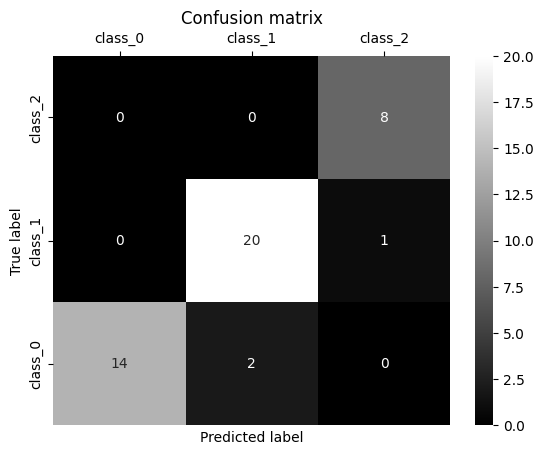

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, xticklabels=wine_dataset.target_names, yticklabels=wine_dataset.target_names, cmap='gray')
ax.set(xlabel='Predicted label', ylabel='True label')
ax.xaxis.tick_top()
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [117]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [118]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.933
Macro average f1 score: 0.935


In [121]:
# метрика качества классификационной модели по умолчанию - правильность 
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), wine_dataset.data, wine_dataset.target == 1)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), wine_dataset.data, wine_dataset.target == 1, scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), wine_dataset.data, wine_dataset.target == 1, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.83333333 0.86111111 0.77777778 0.54285714 0.68571429]
Метрика качества явно заданная правильность: [0.83333333 0.86111111 0.77777778 0.54285714 0.68571429]
Метрика качества AUC: [0.93506494 0.93181818 0.89206349 0.7755102  0.93197279]


In [122]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target == 1, random_state=0)

param_grid = {
    'gamma': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием правильности")
print("Наилучшие параметры: ", grid.best_params_)
print("Наилучшее значение перекрестной проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры:  {'gamma': 1e-05}
Наилучшее значение перекрестной проверки (правильность): 0.790
AUC на тестовом наборе: 0.923
Правильность на тестовом наборе: 0.800


In [124]:
# используем метрику качества AUC
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием AUC")
print("Наилучшие параметры: ", grid.best_params_)
print("Наилучшее значение перекрестной проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием AUC
Наилучшие параметры:  {'gamma': 0.01}
Наилучшее значение перекрестной проверки (AUC): 0.836
AUC на тестовом наборе: 0.819
Правильность на тестовом наборе: 0.819


# Вторая часть задания

In [1]:
import pandas as pd
import random

# данные на 1000 строк
random.seed(42)

data = {'salary': [random.randint(40000, 100000) for _ in range(1000)],
        'city': [random.choice(['Bishkek', 'Moscow', 'London','Berlin','Osh','Kara-Kul','Saint-Petersburg','Paris','New York']) for _ in range(1000)],
        'age': [random.randint(30, 65) for _ in range(1000)],
        'vacation_prefer': [random.choice(['Shopping', 'Beach holiday','Skiing', 'City tour', 'Spa']) for _ in range(1000)],
        'transport_prefer': [random.choice(['auto', 'plane', 'train', 'cruise', 'bike']) for _ in range(1000)],
        'target': [random.choice(['Bishkek', 'Moscow', 'London','Berlin','Osh','Kara-Kul','Saint-Petersburg','Paris','New York']) for _ in range(1000)]}

df = pd.DataFrame(data)
# df

In [2]:
# Преобразование категориальных данных в числовые
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])
# df_encoded

In [3]:
# Выделение обучающей и тестовой выборки
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# проверка оценки модели
from sklearn.metrics import accuracy_score

y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy:.2f}')
# очень низкая точность

Точность: 0.11


In [6]:
# случайные данные
random_data = {'salary': [40000],
               'age': [40],
               'city': ['Moscow'],
               'vacation_prefer': ['Shopping'],
               'transport_prefer': ['auto']}

random_df = pd.DataFrame(random_data)
random_df_encoded = pd.get_dummies(random_df, columns=['city', 'vacation_prefer', 'transport_prefer'])


missing_columns = set(X_train.columns) - set(random_df_encoded.columns)
for column in missing_columns:
    random_df_encoded[column] = 0


random_df_encoded = random_df_encoded[X_train.columns]


prediction = forest.predict(random_df_encoded)
print(f'Предсказание на случайных данных: {prediction[0]}')

Предсказание на случайных данных: Berlin


## Улучшение модели

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X, y, cv=6)

print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.08982036 0.07784431 0.08383234 0.10179641 0.09036145 0.10240964]


In [8]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.09


In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(forest, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.1  0.09 0.11 0.1  0.14 0.08 0.13 0.14 0.09 0.1 ]


In [10]:
kfold = KFold(n_splits=3)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(forest, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.08682635 0.11111111 0.11711712]


In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(forest, X, y, cv=kfold)))
# перемешали данные, стало хуже...

Значения правильности перекрестной проверки:
[0.10179641 0.11711712 0.08108108]


In [12]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size = .5, n_splits=5)
scores = cross_val_score(forest, X, y, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.102 0.122 0.09  0.08  0.114]


In [13]:
# простой решетчатый поиск
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Размер обучающего набора: {} \nРазмер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 750 
Размер тестового набора: 250
Наилучшее значение правильности: 0.13
Наилучшее значение параметров: {'C': 1, 'gamma': 0.01}


In [14]:
from sklearn.svm import SVC 

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0) 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} \nРазмер проверочного набора: {} \nРазмер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
 
best_score = 0 
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:     
    for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:         
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train)         
        score = svm.score(X_valid, y_valid) 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
            
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score)) 
print("Наилучшие значения параметров: ", best_parameters) 
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))  

Размер обучающего набора: 562 
Размер проверочного набора: 188 
Размер тестового набора: 250

Лучшее значение правильности на проверочном наборе: 0.13
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.01}
Правильность на тестовом наборе с наилучшими параметрами: 0.13


In [15]:
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
              'gamma': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
             }
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]})

In [17]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test,y_test)))

Правильность на тестовом наборе: 0.12


In [18]:
print("Наилучшее значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидационной правильности: {:.2f}".format(grid_search.best_score_))

Наилучшее значения параметров: {'C': 1e-05, 'gamma': 1e-05}
Наилучшее значение кросс-валидационной правильности: 0.13


In [19]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046356,0.000396,0.013361,0.000445,0.00001,0.00001,"{'C': 1e-05, 'gamma': 1e-05}",0.126667,0.133333,0.133333,0.133333,0.133333,0.132,0.002667,1
1,0.048863,0.000373,0.014206,0.000238,0.00001,0.0001,"{'C': 1e-05, 'gamma': 0.0001}",0.126667,0.133333,0.133333,0.133333,0.133333,0.132,0.002667,1
2,0.049989,0.001491,0.013388,0.001129,0.00001,0.001,"{'C': 1e-05, 'gamma': 0.001}",0.126667,0.133333,0.133333,0.133333,0.133333,0.132,0.002667,1
3,0.048733,0.001181,0.014801,0.001215,0.00001,0.01,"{'C': 1e-05, 'gamma': 0.01}",0.126667,0.133333,0.133333,0.133333,0.133333,0.132,0.002667,1
4,0.050100,0.000913,0.014170,0.001116,0.00001,0.1,"{'C': 1e-05, 'gamma': 0.1}",0.126667,0.133333,0.133333,0.133333,0.133333,0.132,0.002667,1


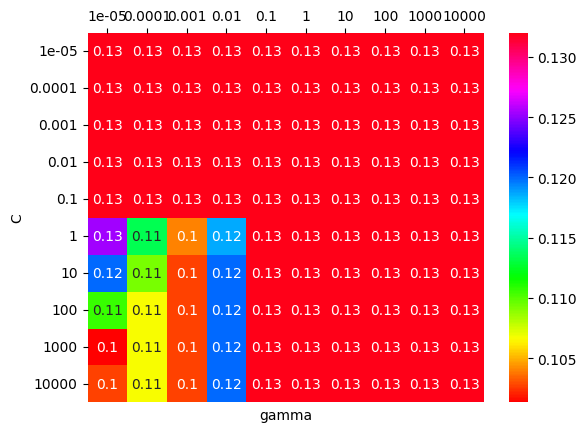

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
scores = np.array(results.mean_test_score).reshape(10,10)

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()

plt.show()

In [ ]:
# удалось улучшить модель только на 0.2, что очень мало